## Notas sobre Energía Eólica
_G. Raush, MF-UPC, 2018_

_**Version: Dic 31, 2018**_

Las presentes notas muestran las concordancias entre la teoría de la probabilidad aplicada al análisis de vientos y las medidas realizadas sobre los histogramas de las medidas realizadas en campo.


El presente documento está desarrollado aprovechando las oportunidades que brinda herramientas de cálculo interactivo como __[Jupyter Notebook](https://jupyter.org/)__ de código libre y que puede ser modificado para ser adaptado a cálculos de otros tipos de vientos. 

La presente sección es necesaria para la carga de los paquetes usados en el cálculo y las consecuentes explicaciones. También para la generación de las expresiones matemáticas simbólicas. Mayores detalles sobre los mismos se pueden  encontrar en la __[página oficial de Python](https://docs.python.org/2.7/)__.

In [3]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-

from __future__ import print_function
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import gamma
import sympy as sp
from IPython.display import display
%matplotlib inline
sp.init_printing(use_unicode=True)

Los vientos tienen unadistribución estadística poco común. La distribución estadística que mejor los explica es la  distribución de Weibull, más detalles en Wikipedia: __[Weibull](https://en.wikipedia.org/wiki/Weibull_distribution)__.

La función de distribución de probabilidad de Weibull tiene la siguiente definición:

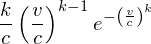

In [4]:
v,c,k = sp.symbols('v c k')
pExpr =  (k/c)*(v/c)**(k-1)*sp.exp(-(v/c)**k)
display(pExpr)

Hay dos parámetros que la definen, uno es el parámetro de escala $c$, en $m/s$ y el otro es el parámetro adimensional de forma $k$. En ningún caso se ha de confundir $c$ con la velocidad media. 

Con la finalidad de poder entender como se comporta esta distribución es necesario definir la versión numérica de la misma para así poder representarla. Se han incluido dos valores por defecto para $c = 10\,m/s$ y para $k=2$. En ambos casos se corresponden con situaciones de vientos reales y en zonas de tierra 

In [5]:
def pdfWeibull(v,c=10.,k=2.) : 
    return (k/c)*(v/c)**(k-1.)*np.exp(-(v/c)**k)

In [6]:
c = 12.7
k = 2.2
pdfWeibull(12.,c=c,k=k)

Prueba de la función con un vector de velocidad, definido de antemano.

In [7]:
vArray = np.array([0,5,10,15,20,25,30])
c = 12
k = 2.5
pdfWeibull(vArray,c=c,k=k)

array([ 0.        ,  0.        ,  0.        ,  0.07664155,  0.07664155,
        0.00205856,  0.00205856])

El siguiente lazo nos muestra la integración numérica de la distribución de Weibull donde vemos que la suma de todos los valores, integrados en el intervalo elegido, tiende a la certeza, suma igual a la unidad. Ahora el vector de velocidad se define con intervalos decrecientes. 

In [8]:
for i in [5.,1.,0.5] :
    vArray = np.arange(0,30,i)
    suma = np.sum(pdfWeibull(vArray,c=c,k=k))*i
    print(suma)

0.992652459113
0.99979747253
0.999915148496


A continuación graficamos la distribución para los valores de $c$ y $k$ por defecto, 10 m/s y 2, respectivamente.

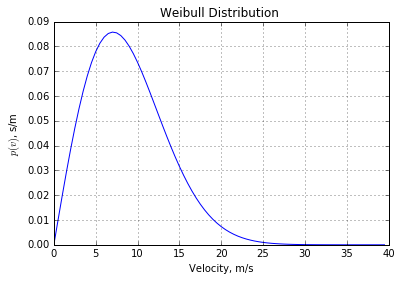

In [9]:
vDelta = 0.5
vArr = np.arange(0,40,vDelta)
yArr = pdfWeibull(vArr)
plt.plot(vArr,yArr)
plt.title(r'Weibull Distribution ')
plt.xlabel('Velocity, m/s')
plt.ylabel('$p(v)$, s/m')
plt.grid()
plt.show()

El comportamiento de $p(v)$ frente al cambio de $c$ queda reflejado en la figura siguiente.

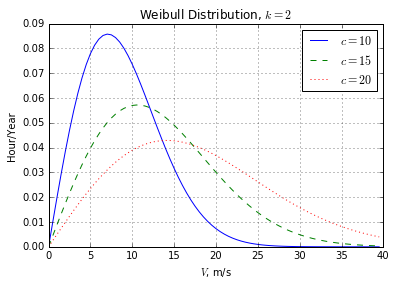

In [10]:
plt.figure()
plt.plot(vArr,pdfWeibull(vArr,c=10),'b')
plt.plot(vArr,pdfWeibull(vArr,c=15),'g--')
plt.plot(vArr,pdfWeibull(vArr,c=20),'r:')
plt.xlabel('$V$, m/s')
plt.ylabel('Hour/Year')
plt.title('Weibull Distribution, $k = 2$')
plt.legend(['$c = 10$' , '$c = 15$', '$c = 20$'])
plt.grid()
plt.show()

Apreciamos como las distribuciones de las velocidades se uniformizan conforme aumenta el factor de escala $c$. Se debe tener presente que en todos los casos el área debajo de las curvas es la misma, y en el caso teórico es la unidad.

Similar análisis sobre el parámetro de forma $k$, para un $c$ constante, nos muestra que:

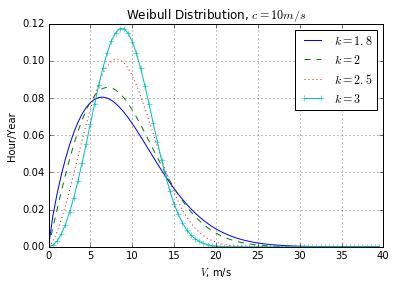

In [11]:
plt.figure()
plt.plot(vArr,pdfWeibull(vArr,k=1.8),'b')
plt.plot(vArr,pdfWeibull(vArr,k=2),'g--')
plt.plot(vArr,pdfWeibull(vArr,k=2.5),'r:')
plt.plot(vArr,pdfWeibull(vArr,k=3.),'c+-')
plt.xlabel('$V$, m/s')
plt.ylabel('Hour/Year')
plt.title('Weibull Distribution, $c = 10 m/s$')
plt.legend(['$k = 1.8$' , '$k = 2$', '$k = 2.5$', '$k = 3$'])
plt.grid()
plt.show()

Apreciamos que un factor de forma más alto aproxima a una distribución más simétrica, y con similitud a una distribución normal. Los valores de $k \,\approx\, 3$ son los tipos de distribuciones que se encuentran en vientos marinos o de costas. Los valores, próximos a $k \,\approx\, 2$, son los correspondientes a distribuciones de zonas de territorios interiores.  Para los casos de $k = 2$ existe la posibidad de usar la distribución de Rayleigh, para más detalles, __[ver aquí](https://en.wikipedia.org/wiki/Rayleigh_distribution)__.

### Cálculos de media, mediana, varianza, desviación

La media es el valor más probable de la distribución y la mediana es el que tiene la mayor probabilidad, el punto de máxima $p(v)$, $\max\left[p(v)\right]$.

La velocidad media se define según $V_{mean}\,=\, \int_{0}^{\infty} p(v)\,v\, dv\, = \int_{0}^{\infty} \left[ \frac{k}{c}\, \left(\frac{v}{c}\right)^{k - 1} e^{- \left(\frac{v}{c}\right)^{k}}\right]\,v\, dv$

Siendo $p(v) = \frac{k}{c} \,\left(\frac{v}{c}\right)^{k - 1} e^{- \left(\frac{v}{c}\right)^{k}}$

La forma discreta de esta integral, cuando se dispone del _**histograma normalizado**_ se puede según:

$ v_{mean} = \sum_{{i=0}}^{\infty} p_i v_i $

Más detalles sobre la definición de la  velocidad media se define como la esperanza matemática $E\left[v\right]$, __[ver aquí](https://en.wikipedia.org/wiki/Expected_value)__.


Sin integramos la expresión de la  velocidad media para Weibull: 


$V_{mean} = c \, \Gamma\left(1 + \frac{1}{k}\right)$


De similar forma podemos obtener las expresiones de las desviaciones y la media,
$\sigma = \sqrt{Var(v)} = \sqrt{ E\left[v^2\right] -\left(E\left[v\right]\right)^2}$

Integrando obtenemos la expresión de trabajo, $\sigma = c \, \sqrt{\Gamma\left(\frac{k+2}{k}\right) - \left[\Gamma\left(\frac{k+1}{k}\right)\right]^2}$ 

El cociente entre la desviación y la media es el _índice de turbulencia_.

$I = \frac{\sigma}{V_{mean}} = \frac{ \sqrt{\Gamma\left(\frac{k+2}{k}\right) - \left[\Gamma\left(\frac{k+1}{k}\right)\right]^2}}{\Gamma\left(\frac{k+1}{k}\right)} =  \sqrt{\frac{\Gamma\left(\frac{k+2}{k}\right)}{\left[\Gamma\left(\frac{k+1}{k}\right)\right]^2} - 1}$ 

Por último, la cantidad no menos importante es el _Factor de Energía_, $F_e$ que relaciona la potencia efectiva disponible relacionado con la potencia de la velocidad media:

$F_e = \frac{P_{eff}}{P_{mean}} = \frac{V_{eff}^3}{V_{mean}^3} = {\frac{\Gamma\left(\frac{k+3}{k}\right)}{\left[\Gamma\left(\frac{k+1}{k}\right)\right]^3}} $

##  Ejemplo Nº1

Para el siguiente ejemplo contamos con un histograma claseificado en intervalos de velocidad de 2.5 m/s y la frecuencia de medidas que se han tenido los valores de cada clase.

In [12]:
velMeas = np.array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
        22.5,  25. ,  27.5,  30. ,  32.5])
freqMeas = np.array([   0.        ,  236.85483901,  485.51685582,  640.28833191,
        660.59298818,  564.82934492,  409.71522908,  254.88889276,
        136.71787109,   63.38524061,   25.42475597,    8.82397346,
          2.64857845,    0.68701123])

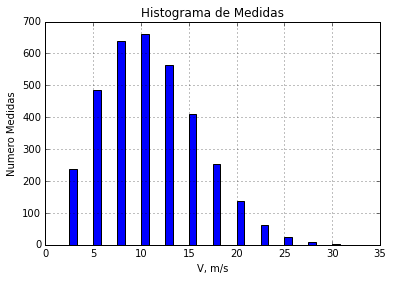

In [13]:
plt.bar(velMeas,freqMeas)
plt.title('Histograma de Medidas')
plt.xlabel('V, m/s')
plt.ylabel('Numero Medidas')
plt.grid()
plt.show()

#### Obtención del histograma normalizado

Para conseguirlo, siguiendo la técnica usada en la práctica de "Análisis Estadístico del Viento", dividimos cada una de las cantidades medidas por el total de medidas. 

Total de medidas:

In [14]:
totalMedidas = sum(freqMeas)
totalMedidas

In [15]:
freqMeasNorm = freqMeas/totalMedidas
sum(freqMeasNorm)

Vemos que ahora la suma es la unidad, correspondiente con la certeza a nivel de probabilidad.

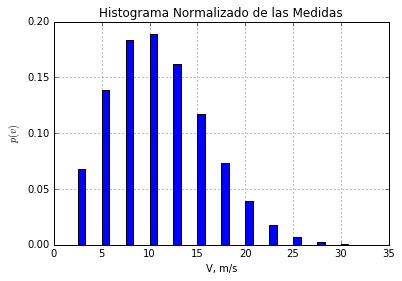

In [16]:
plt.bar(velMeas,freqMeasNorm)
plt.title('Histograma Normalizado de las Medidas')
plt.xlabel('V, m/s')
plt.ylabel('$p(v)$')
plt.grid()
plt.show()

Si aplicáramos el método de la práctica, llegaríamos a que los valores de modelo estadístico para este caso serían aproximadamente , $c \approx 12.0\, m/s$ y $k \approx  2.3$
Con la finalidad de conocer lo bien o mal que ajusta al modelo de la medida, graficaremos en forma conjunta las medidas y el modelo. Para ello, debemos crear los datos del modelo y lo haremos usando un vector de velocidades con incrementos de 1 m/s.

In [17]:
vArrayWeib = np.arange(0,35.,1.)
c = 12.0
k = 2.3
pArrayWeib = pdfWeibull(vArrayWeib,c=c,k=k)
pArrayWeib.sum()

Verificamos el valor del área (integral) de la distribución de probabilidad. 

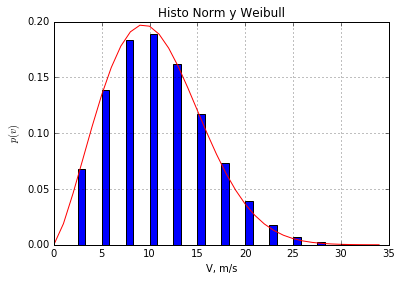

In [18]:
plt.figure()
plt.plot(vArrayWeib,pArrayWeib*2.5,'r')
plt.bar(velMeas,freqMeasNorm)
plt.title('Histo Norm y Weibull')
plt.xlabel('V, m/s')
plt.ylabel('$p(v)$')
plt.grid()
plt.show()


### Cálculo de las velocidades medias, histograma y Weibull

Para el caso del histograma sumaremos los productos de la velocidad por la frecuencia normalizada y para el caso de Weibull ocuparemos las expresiones de $\Gamma\left(\cdot\right)$

También definiremos una función de medida del error comentido, $Err = \frac{V_{m} - V_{e}}{V_{e}}$

In [19]:
def errRel(x,y):
    return (y-x)/x

In [20]:
vMeanHisto = sum(velMeas*freqMeasNorm)
vMeanHisto 

In [21]:
vMeanWeib = c*gamma(1+1/k)
vMeanWeib

La medida del error entre ambos valores es:

In [22]:
errRel(vMeanWeib,vMeanHisto)*100

Vemos que el error comentido es de un 1%, aproximadamente.

### Cálculo de la densidad de potencia, media y eficaz

Las valoraciones se harán sobre la unidad de área. A los efectos de cálculo no afecta el área del rotor ya que la misma área se aplica para ambos casos. Se considerará una condición de densidad de aire de _Condiciones Normales de Presión y Temperatura_, **$P_{atm} = 760\, mmHg$** y **$t_{amb} = 15^{o}C$**, $\rho = 1.225\,kg/m³$

La potencia disponible por unidad de área, o densidad de potencia, también está afectada por la probabilidad $p(v,c,k)$ de la existencia de la $v$. Para el caso de la definoción de función contínua, $P_{aval} =   \int_{0}^{\infty} \, \frac{1}{2} \, \rho\,p(v,c,k) \, v^{3} \, dv$ 
La definición de la forma discreta es: $P_{avail} = \sum_{i=0}^{N} \frac{1}{2} \, \rho\,p_{i} \, v_{i}^{3}$. Siendo $N$ el número total de clases de medidas de velocidad. En el caso del Ejemplo, $N=14$.

La potencia por unidad de área es:

In [23]:
rhoNum = 1.225
PowerAvail = sum(0.5*rhoNum*freqMeasNorm*velMeas**3)
PowerAvail

La potencia correspondiente al valor de la velocidad media $V_{mean}$ es:

In [24]:
PowerMean = 0.5*rhoNum*vMeanHisto**3
PowerMean

Factor de energía viene definido entre la potencia disponible y la correspndiente a la velocidad media $F_e = \frac{Pow_{Avail}}{Pow_{Mean}}$

In [25]:
Fe = PowerAvail/PowerMean
Fe

Calculado desde las funciones dependientes de $\Gamma$, definido por el cociente de $F_{e} = \frac{\Gamma\left(1+\frac{3}{k}\right)}{\Gamma\left(1+\frac{1}{k}\right){3}}$

In [26]:
FeWeib = gamma(1+3/k)/gamma(1+1/k)**3
FeWeib

De nuevo se tiene un error inferior al 1%:

In [27]:
errRel(Fe,FeWeib)*100

De la mismas forma como ya se hace en sistemas eléctricos, cuando la fuente de energía es variable, es conveniente definir un valor eficaz de la magnitud responsable de la misma. De esta manera se puede definir un valor de la velocidad eficaz o RMS, $V_{RMS}$. 
El valor de la misma queda definida como $V_{RMS} = \sqrt[3]{\int_{0}^{\infty}\frac{1}{2}\, p(v,c,k)\,v^3\,dv}$

Desde el histograma, la definición discreta de la misma queda : $V_{RMS}\,=\,\sqrt[3]{\sum_{i=0}^{N}\,p_{i}\,v_{i}^3}$

In [28]:
vRMS = (sum(freqMeasNorm*velMeas**3))**(1./3.)
vRMS

Si ahora consideramos un viento de velocidad constante igual a $V_{rms}$, la densidad de  potencia disponible será:

In [29]:
0.5*rhoNum*vRMS**3

De aquí la importancia del $F_e$ ya que del mismo obtenemos el valor de $V_{RMS}$ a partir de la $V_{mean}$ y los parámetros de Weibull. $F_e= \frac{V_{rms}^3}{V_{mean}^3}$

La ventaja de usar el $F_e$ a partir del modelo, permite hacerla estimación de la potencia disponible directamente, sin pasar por los cálculos de histograma. El siguiente ejemplo lo muestra, para los valores de $c = 9.5\, m/s$ y $k = 1.8$:  

In [30]:
c2 = 9.5 
k2 = 1.8
vMean2 = c*gamma(1+1/k2)
Fe2 = gamma(1+3/k2)/gamma(1+1/k2)**3
PowerMean2 = 0.5*rhoNum*vMean2**3
PowerAvail2 = Fe2*PowerMean2
print('Vmean = %.2f m/s\nFe = %.2f\nPowerMean = %.2f W\nPowerAvail = %.2f W' % (vMean2,Fe2,PowerMean2,PowerAvail2))

Vmean = 10.67 m/s
Fe = 2.14
PowerMean = 744.35 W
PowerAvail = 1592.44 W


La energía disponible $E_{avail}= 8760\cdot\,P_{avail}$, pero en el eje de turbina solo llega el $E_{util}\,=\,C_p\,\cdot\,E_{avail}$

Energía generada, asumiendo un $C_p\,=\,0.4$.

In [31]:
Cp = 0.4
EnergiaDisponible = (365*24)*PowerAvail2/1000.
EnergiaUtil = 8760*Cp*PowerAvail2/1000.
print('Energía Disponible = %.0f kWh\nEnergía Disponible = %.0f kWh' % (EnergiaDisponible, EnergiaUtil))


Energía Disponible = 13950 kWh
Energía Disponible = 5580 kWh


Esta última es la que se puede mandar a eje de generador eléctrico.

Pero se ha de tener presente que el coeficiente de potencia $C_p$ no se mantiene constante en todas las velocidades del viento. En las máquinas reales es variable.

Por último podemos graficar la densidad de potencia disponible en función de la velocidad del viento. Para conseguirlo tenemos que crear unos vectores para la potencia de cada una de las frecuencias de velocidad del histograma. 

In [32]:
powHisto = 0.5*rhoNum*freqMeasNorm*velMeas**3

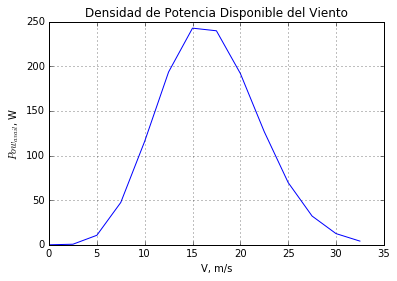

In [35]:
plt.figure()
plt.plot(velMeas,powHisto,'b')
plt.title('Densidad de Potencia Disponible del Viento')
plt.xlabel('V, m/s')
plt.ylabel('$Pow_{avail}$, W')
plt.grid()
plt.show()